In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('/Users/vinicius.araujo/Desktop/Sprint5- Triple10/.venv/vehicles.csv') 

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [82]:
df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
20541,9000,2008.0,chevrolet silverado,good,NaN,diesel,202000.0,automatic,truck,white,1.0,2018-12-23,56
31992,12995,2012.0,acura tl,like new,6.0,gas,94121.0,automatic,sedan,NaN,1.0,2018-07-17,22
10609,3975,2005.0,volkswagen jetta,excellent,5.0,gas,175467.0,automatic,sedan,silver,NaN,2018-09-15,42
43219,13995,2013.0,honda pilot,excellent,6.0,gas,118865.0,automatic,SUV,grey,1.0,2019-04-17,71
31965,9495,2014.0,ford explorer,good,6.0,gas,170000.0,automatic,SUV,custom,1.0,2019-01-16,9
46630,11295,2014.0,nissan altima,good,4.0,gas,83383.0,automatic,other,brown,NaN,2018-12-30,35
22873,7500,2014.0,volkswagen jetta,excellent,4.0,gas,72027.0,automatic,sedan,red,NaN,2018-06-30,58
16369,10995,2015.0,volkswagen passat,good,4.0,diesel,91444.0,automatic,sedan,NaN,NaN,2019-01-28,13
48409,10500,1994.0,chevrolet camaro,like new,8.0,gas,43200.0,automatic,coupe,white,NaN,2018-05-12,133
38385,8678,2014.0,chevrolet equinox,excellent,6.0,gas,178490.0,automatic,SUV,silver,1.0,2018-10-22,37


In [83]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [84]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [85]:
#Preenchimento dos dados das colunas com NaN com a mediana nas colunas numericas, unknown na coluna categorica.
df['odometer'] = df['odometer'].fillna(df['odometer'].median())
df['model_year'] = df['model_year'].fillna(df['model_year'].median())
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].median())
df['paint_color'] = df['paint_color'].fillna('unknown')
df['is_4wd'] = df['is_4wd'].fillna(0) #Preenchimento com 0 aqui signifincando como falso(não é 4x4)

In [86]:
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [87]:
#Alteração do tipo de dados das colunas para uma melhor analise
df['model_year'] = df['model_year'].astype(int)
df['odometer'] = df['odometer'].astype(int)
df['is_4wd'] = df['is_4wd'].astype(int)

In [88]:
#alteração do tipo de dado da coluna de datas para uma melhor analise
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [89]:
df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
33879,25995,2015,ford f-150,excellent,6.0,gas,105006,automatic,truck,unknown,1,2018-12-08,25
28893,9500,2013,toyota camry,excellent,4.0,gas,113000,automatic,sedan,grey,0,2019-04-09,18
23558,15499,2011,ford f-150,excellent,6.0,gas,131450,automatic,pickup,black,1,2019-02-09,83
3467,22795,2016,chevrolet silverado,excellent,6.0,gas,42346,automatic,pickup,black,1,2019-01-01,81
51272,6650,2010,nissan maxima,like new,6.0,gas,113000,automatic,sedan,red,0,2018-11-04,32
18053,14995,2014,chevrolet silverado,like new,6.0,gas,174240,automatic,truck,white,1,2018-07-01,29
20761,14905,2015,buick enclave,good,6.0,gas,103408,automatic,SUV,silver,0,2018-08-13,54
40782,4500,2008,ford ranger,good,6.0,gas,147000,automatic,pickup,white,0,2018-08-13,51
33001,21500,2008,ford f250,excellent,8.0,diesel,93000,automatic,truck,white,1,2019-02-04,26
30213,3500,2005,nissan altima,excellent,4.0,gas,196315,automatic,coupe,silver,0,2018-11-06,97


In [90]:
#Checagem de existencia de duplicatas no dataFrame para tratamento
df[df.duplicated()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 5.1+ MB


Até o momento fiz todo o tratamento dos dados fazendo alteraçoes nas colunas onde nao possuiam dados que são relevantes para nossa analise, alem disso fiz a alteração dos tipos de dados para que possa ter uma melhor visualização quando formos utilizar comparativos para criação de histograma e graficos visuais. 

Também foi feita a checagem de todo o dataFrame para analise de possiveis dados duplicados, que nao foi o caso. E agora os dados ja estão todos tratados, limpos e devidamente preparados para a analise e criaçao dos graficos visuais e dashboard.

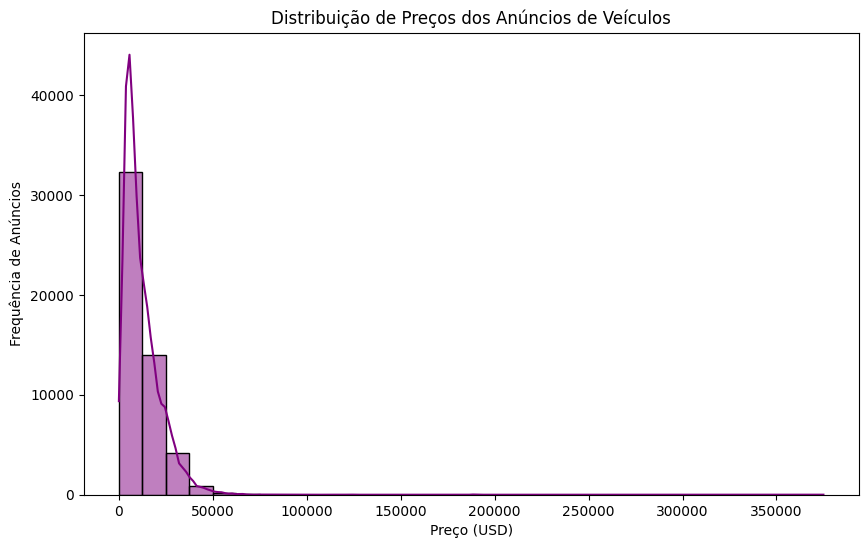

In [92]:
#Como os preços, a quilometragem ou os anos dos carros estão distribuídos no nosso conjunto de dados?
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='price',
    bins=30, 
    kde=True,
    color='purple'
)
plt.title('Distribuição de Preços dos Anúncios de Veículos')
plt.xlabel('Preço (USD)')
plt.ylabel('Frequência de Anúncios')
plt.show()

Podemos notar olhando o grafico que os carros de menor preço tem uma frequencia maior de anuncios. Carros mais caros(acima de 50 mil) acabam nao tendo poucos anuncios ou nenhum.

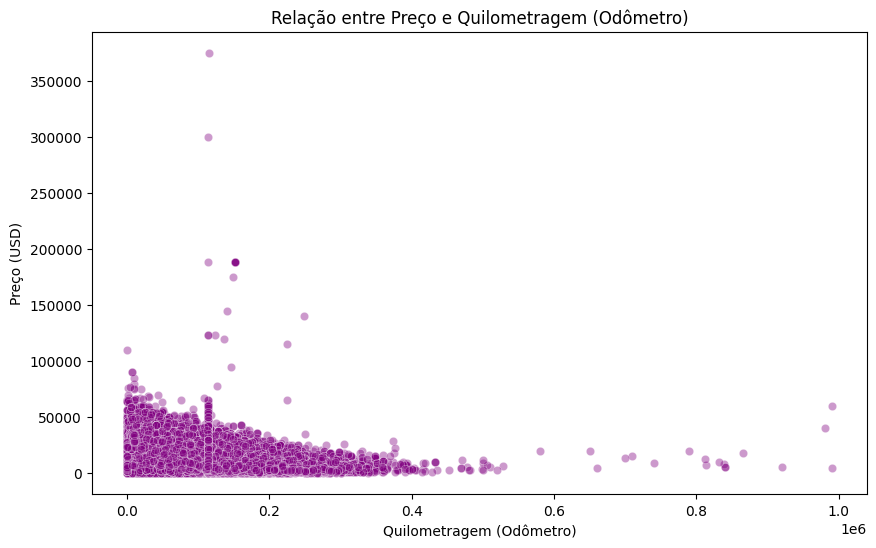

In [99]:
#Existe alguma relação (correlação) entre o preço e o hodometro(Quilometragem) do carro?
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='odometer',
    y='price',
    alpha=0.4,
    color='purple'
)
plt.title('Relação entre Preço e Quilometragem (Odômetro)')
plt.xlabel('Quilometragem (Odômetro)')
plt.ylabel('Preço (USD)')
plt.show()

O gráfico de dispersão mostra uma clara correlação negativa entre preço e quilometragem, a medida que a quilometragem de um veículo aumenta, seu preço tende a diminuir

/var/folders/9q/83m7m7m14yz4ly2f91ggbl_r0000gp/T/ipykernel_27119/3112589961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


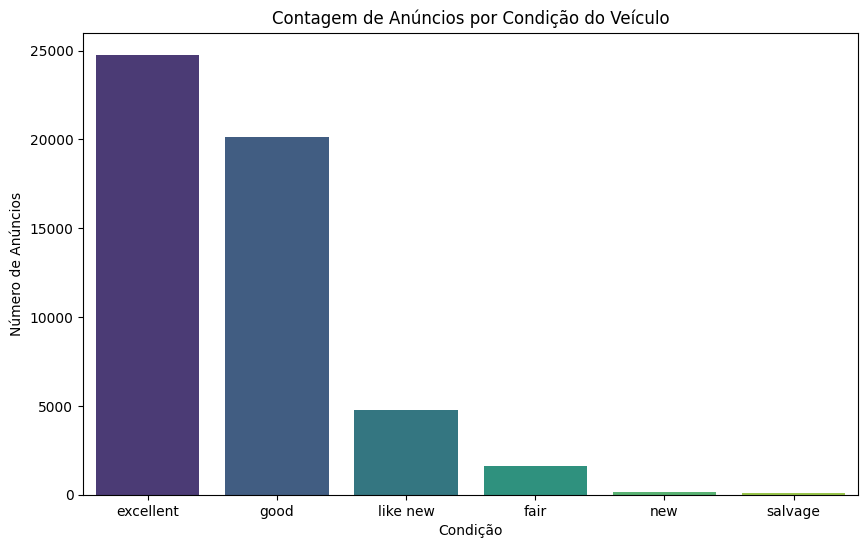

In [94]:
#Qual é a frequência de anuncios para cada categoria dos carros?
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='condition',
    order=df['condition'].value_counts().index,
    palette='viridis'
)
plt.title('Contagem de Anúncios por Condição do Veículo')
plt.xlabel('Condição')
plt.ylabel('Número de Anúncios')
plt.show()

O gráfico de barras mostra que a maioria dos carros anunciados está em 'excellent' ou 'good' condition com uma grande diferença entre as demais categorias. 

/var/folders/9q/83m7m7m14yz4ly2f91ggbl_r0000gp/T/ipykernel_27119/2725793234.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


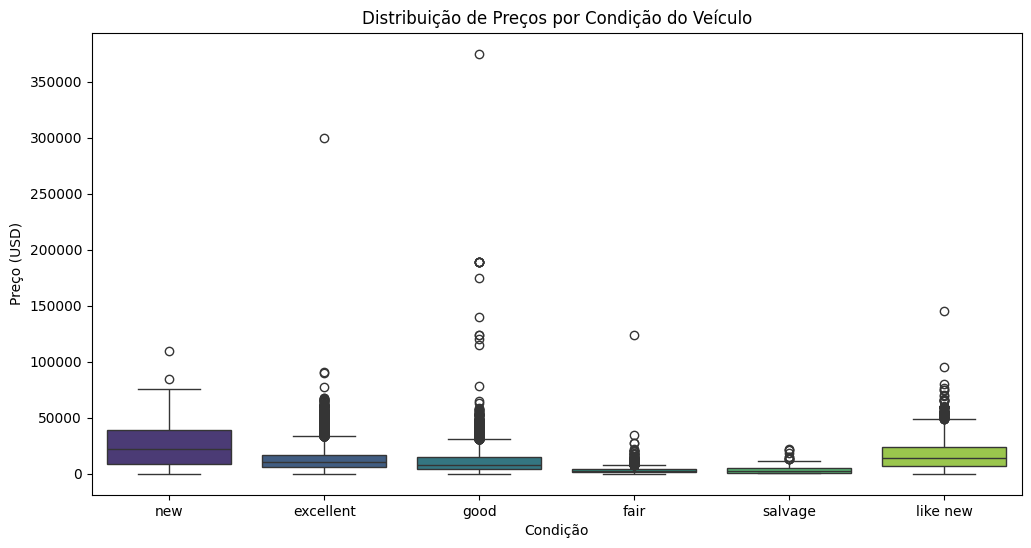

In [95]:
#A distribuição do preço é diferente dependendo da condição do carro?
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='condition',
    y='price',
    order=['new', 'excellent', 'good', 'fair', 'salvage', 'like new'], 
    palette='viridis'
)
plt.title('Distribuição de Preços por Condição do Veículo')
plt.xlabel('Condição')
plt.ylabel('Preço (USD)')
plt.show()

O diagrama de caixa revela que a mediana dos preços de carros 'new' é significativamente mais alta do que a dos carros de outras condições.
Ele também mostra que, mesmo em condições piores, há outliers de preços mais altos.

In [ ]:
from scipy import stats 

alpha = 0.05

print(" Teste de Hipótese - Preço de Carros 'new' vs 'excellent' ")

sample_new = df.loc[df['condition'] == 'new', 'price']
sample_excellent = df.loc[df['condition'] == 'excellent', 'price']

t_stat, p_value = stats.ttest_ind(sample_new, sample_excellent, equal_var=False)

print(f"Estatística T: {t_stat:.3f}")
print(f"P-valor: {p_value:.3e}") 

# Resultado dos testes de hipoteses
if p_value < alpha:
    print(f"Com um p-valor de {p_value:.3e}, que é menor que {alpha}, REJEITAMOS a hipótese nula.")
    print("Conclusão: Há evidências estatísticas para afirmar que o preço médio dos carros 'new' é diferente do preço médio dos carros 'excellent'.")
else:
    print(f"Com um p-valor de {p_value:.3f}, que é maior ou igual a {alpha}, NÃO REJEITAMOS a hipótese nula.")
    print("Conclusão: Não há evidências estatísticas para afirmar que os preços médios são diferentes.")


 Teste de Hipótese - Preço de Carros 'new' vs 'excellent' 
Estatística T: 7.527
P-valor: 5.426e-12
Com um p-valor de 5.426e-12, que é menor que 0.05, REJEITAMOS a hipótese nula.
Conclusão: Há evidências estatísticas para afirmar que o preço médio dos carros 'new' é diferente do preço médio dos carros 'excellent'.


Concluindo, podemos afirmar que os os preços de carros novos sao mais altos que os de carros em excelentes condiçoes. Também podemos notar que os carros de menor valor sao mais frequentes nos anuncios de vendas para carros usados, e grande parte deles são encontrados em excelentes ou boas condições. 

Por ultimo podemos notar que carros com uma menor quilometragem são vendidos por um valor maior, quando correlacionamos as duas categorias a serem analisadas. 